## Loading datasets

In [2]:
import pandas as pd

country_agg_data = pd.read_excel("CountryLevel_DatabankWide.xlsx", sheet_name=0)  # Country-level data
country_databank = pd.read_csv("micro_world_139countries.csv", encoding='ISO-8859-1')  # Individual-level data


In [3]:
selected_columns = [
    'economy', 'regionwb', 'age', 'female', 'inc_q', 'educ',
    'anydigpayment', 'pay_utilities',
    'internetaccess', 'mobileowner', 'year'
]

country_databank = country_databank[selected_columns].copy()


## Data Preparation & Cleaning

In [4]:
country_databank['female'] = country_databank['female'].replace({2: 0, 1: 1})  # (1 = Female, 0 = Male)
country_databank['internetaccess'] = country_databank['internetaccess'].replace({2: 0})  # (1 = Yes, 0 = No)
country_databank['mobileowner'] = country_databank['mobileowner'].replace({2: 0})  # (1 = Yes, 0 = No)

# Missing value treatment
country_databank = country_databank.dropna(subset=['anydigpayment'])
country_databank['pay_utilities'].fillna(0, inplace=True)
country_databank = country_databank[~country_databank['educ'].isin([4, 5])]

print(country_databank.head())

# Save cleaned data
country_databank.to_csv("Cleaned_Digital_Payment_Data.csv", index=False)


<ipython-input-4-5aeee80aa59a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  country_databank['pay_utilities'].fillna(0, inplace=True)


       economy    regionwb   age  female  inc_q  educ  anydigpayment  \
0  Afghanistan  South Asia  43.0       0      4     2              1   
1  Afghanistan  South Asia  55.0       0      3     1              0   
2  Afghanistan  South Asia  15.0       1      2     1              0   
3  Afghanistan  South Asia  23.0       0      4     1              0   
4  Afghanistan  South Asia  46.0       1      1     1              0   

   pay_utilities  internetaccess  mobileowner  year  
0              1               0            1  2021  
1              4               0            1  2021  
2              4               0            0  2021  
3              4               0            1  2021  
4              4               0            0  2021  


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Summary statistics
summary_stats = country_databank.describe()
summary_stats


,age,female,inc_q,educ,anydigpayment,pay_utilities,internetaccess,mobileowner,year
count,142684.000000,143132.000000,143132.000000,143132.000000,143132.000000,143132.000000,143132.000000,143132.000000,143132.000000
mean,41.038252,0.532306,3.235699,1.954972,0.649498,2.567770,0.714893,0.884051,2021.111436
std,17.324474,0.498957,1.419491,0.701528,0.477129,1.327579,0.481177,0.331170,0.314672
min,15.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2021.000000
25%,27.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2021.000000
50%,38.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2021.000000
75%,54.000000,1.000000,5.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2021.000000
max,99.000000,1.000000,5.000000,3.000000,1.000000,5.000000,4.000000,4.000000,2022.000000


In [6]:
# Digital Payment Adoption Rate
digital_payment_rate = country_databank['anydigpayment'].value_counts(normalize=True) * 100
print("Digital Payment Adoption Rate:\n", digital_payment_rate)

gender_payment = country_databank.groupby('female')['anydigpayment'].mean() * 100
print("\nDigital Payment Adoption by Gender:\n", gender_payment)


income_payment = country_databank.groupby('inc_q')['anydigpayment'].mean() * 100
print("\nDigital Payment Adoption by Income Level:\n", income_payment)

education_payment = country_databank.groupby('educ')['anydigpayment'].mean() * 100
print("\nDigital Payment Adoption by Education Level:\n", education_payment)

region_payment = country_databank.groupby('regionwb')['anydigpayment'].mean() * 100
print("\nDigital Payment Adoption by Region:\n", region_payment)



Digital Payment Adoption Rate:
 anydigpayment
1    64.949837
0    35.050163
Name: proportion, dtype: float64

Digital Payment Adoption by Gender:
 female
0    69.563204
1    60.896443
Name: anydigpayment, dtype: float64

Digital Payment Adoption by Income Level:
 inc_q
1    52.186664
2    59.350613
3    63.228208
4    68.213254
5    75.243112
Name: anydigpayment, dtype: float64

Digital Payment Adoption by Education Level:
 educ
1    35.749456
2    69.068107
3    90.728930
Name: anydigpayment, dtype: float64

Digital Payment Adoption by Region:
 regionwb
East Asia & Pacific (excluding high income)           67.409716
Europe & Central Asia (excluding high income)         66.161803
High income                                           94.974552
Latin America & Caribbean (excluding high income)     51.823969
Middle East & North Africa (excluding high income)    35.302321
South Asia                                            35.822389
Sub-Saharan Africa (excluding high income)            4

<ipython-input-7-91c66cdddc75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=digital_payment_rate.index, y=digital_payment_rate.values, palette="Blues")


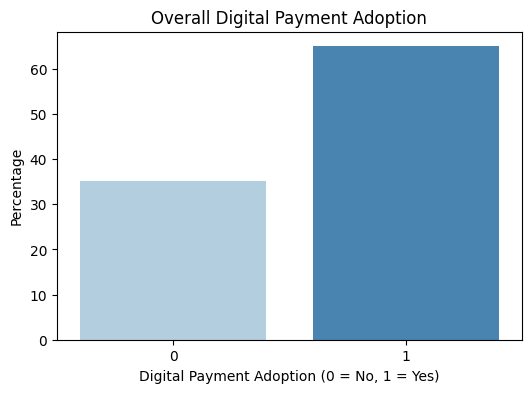

In [7]:
# Digital Payment Adoption Rate
plt.figure(figsize=(6,4))
sns.barplot(x=digital_payment_rate.index, y=digital_payment_rate.values, palette="Blues")
plt.xlabel("Digital Payment Adoption (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.title("Overall Digital Payment Adoption")
plt.show()


<ipython-input-8-f1d15e4fca86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_payment.index, y=gender_payment.values, palette="coolwarm")


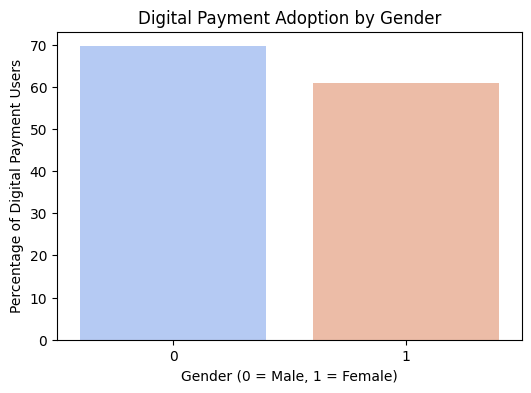

In [8]:
# Digital Payment Rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(x=gender_payment.index, y=gender_payment.values, palette="coolwarm")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Percentage of Digital Payment Users")
plt.title("Digital Payment Adoption by Gender")
plt.show()


<ipython-input-9-6f2c19a3eab8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_payment.index, y=income_payment.values, palette="Greens")


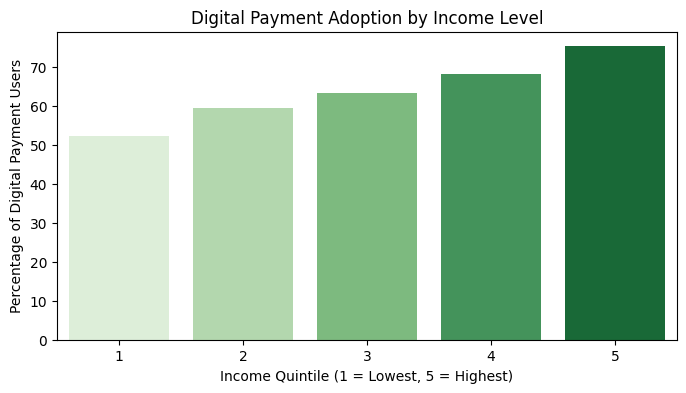

In [9]:
# Digital Payment Rate by Income Level
plt.figure(figsize=(8,4))
sns.barplot(x=income_payment.index, y=income_payment.values, palette="Greens")
plt.xlabel("Income Quintile (1 = Lowest, 5 = Highest)")
plt.ylabel("Percentage of Digital Payment Users")
plt.title("Digital Payment Adoption by Income Level")
plt.show()


<ipython-input-11-c996d9fb5708>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_payment.index, y=education_payment.values, palette="Oranges")


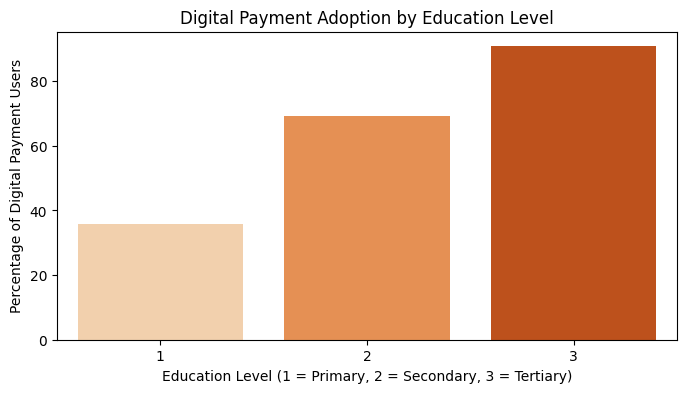

In [11]:
# Digital Payment Rate by Education Level
plt.figure(figsize=(8,4))
sns.barplot(x=education_payment.index, y=education_payment.values, palette="Oranges")
plt.xlabel("Education Level (1 = Primary, 2 = Secondary, 3 = Tertiary)")
plt.ylabel("Percentage of Digital Payment Users")
plt.title("Digital Payment Adoption by Education Level")
plt.show()


<ipython-input-12-a03d0547bfac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_payment.index, y=region_payment.values, palette="Purples")


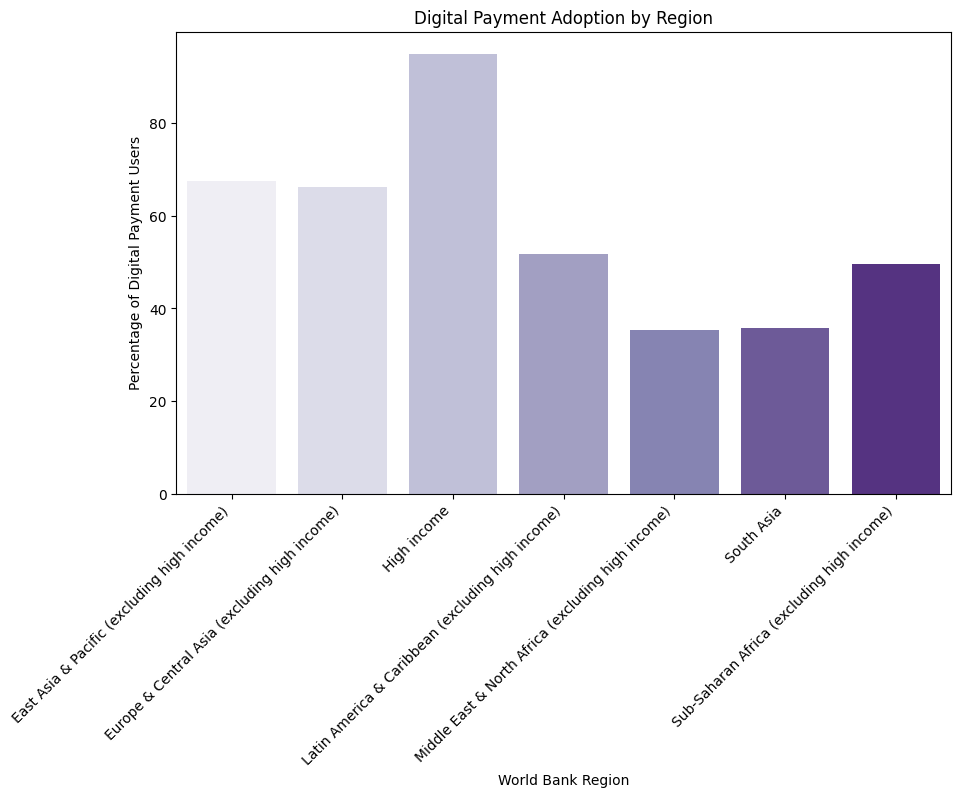

In [12]:
# Digital Payment Rate by Region
plt.figure(figsize=(10,6))
sns.barplot(x=region_payment.index, y=region_payment.values, palette="Purples")
plt.xticks(rotation=45, ha="right")
plt.xlabel("World Bank Region")
plt.ylabel("Percentage of Digital Payment Users")
plt.title("Digital Payment Adoption by Region")
plt.show()

In [14]:
# Pivot table for variables
pivot_table = pd.pivot_table(
    country_databank,
    values='anydigpayment',
    index=['regionwb', 'inc_q', 'educ', 'female'],
    aggfunc='mean'
) * 100

pivot_table = pivot_table.reset_index()
pivot_table.rename(columns={'anydigpayment': 'Digital Payment Adoption (%)'}, inplace=True)

from IPython.display import display
display(pivot_table)

,regionwb,inc_q,educ,female,Digital Payment Adoption (%)
0,East Asia & Pacific (excluding high income),1,1,0,48.400853
1,East Asia & Pacific (excluding high income),1,1,1,32.825719
2,East Asia & Pacific (excluding high income),1,2,0,65.465465
3,East Asia & Pacific (excluding high income),1,2,1,54.623656
4,East Asia & Pacific (excluding high income),1,3,0,86.792453
...,...,...,...,...,...
205,Sub-Saharan Africa (excluding high income),5,1,1,31.691510
206,Sub-Saharan Africa (excluding high income),5,2,0,75.055049
207,Sub-Saharan Africa (excluding high income),5,2,1,68.097913
208,Sub-Saharan Africa (excluding high income),5,3,0,93.897883


In [15]:
# Random Forest Regressor for imputing missing age
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

features = ['female', 'inc_q', 'educ', 'internetaccess', 'mobileowner', 'anydigpayment']

age_known = country_databank.dropna(subset=['age'])

age_missing = country_databank[country_databank['age'].isna()]

X = age_known[features]
y = age_known['age']

imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

if not age_missing.empty:
    X_missing = imputer.transform(age_missing[features])
    predicted_ages = model.predict(X_missing)

    country_databank.loc[country_databank['age'].isna(), 'age'] = predicted_ages

print("Missing age values after imputation:", country_databank['age'].isna().sum())

Missing age values after imputation: 0


<ipython-input-16-8b59c68ce0fc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_adoption = country_databank.groupby('age_group')['anydigpayment'].mean() * 100
<ipython-input-16-8b59c68ce0fc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_adoption.index, y=age_adoption.values, palette="magma")


Digital Payment Adoption Rates by Age Group:
 age_group
15-24     50.337593
25-34     65.293865
35-44     67.956101
45-54     68.344477
55-64     70.230570
65-74     73.955877
75-84     73.231890
85-100    68.000000
Name: anydigpayment, dtype: float64


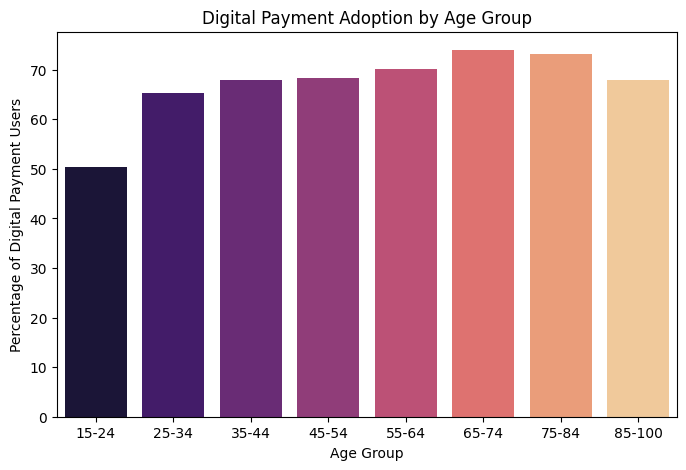

In [16]:
# Bucketing age for easiier visualization
age_bins = [15, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ["15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85-100"]

country_databank['age_group'] = pd.cut(country_databank['age'], bins=age_bins, labels=age_labels, right=False)

age_adoption = country_databank.groupby('age_group')['anydigpayment'].mean() * 100

print("Digital Payment Adoption Rates by Age Group:\n", age_adoption)

plt.figure(figsize=(8,5))
sns.barplot(x=age_adoption.index, y=age_adoption.values, palette="magma")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Digital Payment Users")
plt.title("Digital Payment Adoption by Age Group")
plt.show()

## Pivot/Graphs

In [18]:
# Age Group vs Income Level
pivot_age_income = pd.pivot_table(
    country_databank, values='anydigpayment', index='age_group', columns='inc_q', aggfunc='mean'
) * 100
pivot_age_income

<ipython-input-18-eec6176baca2>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_income = pd.pivot_table(


inc_q,1,2,3,4,5
age_group,,,,,
15-24,42.897384,44.566342,48.543135,51.847355,60.080226
25-34,50.271794,56.887951,61.931913,68.498528,77.647185
35-44,55.635335,62.663542,65.891043,72.466998,78.281156
45-54,55.743652,63.248089,67.697842,71.419257,77.581066
55-64,53.315447,64.977134,68.086501,74.725576,80.499786
65-74,60.475401,71.557028,74.403292,75.944487,81.877133
75-84,62.827225,72.079439,72.952586,76.595745,78.505535
85-100,64.417178,65.193370,67.379679,69.743590,71.875000


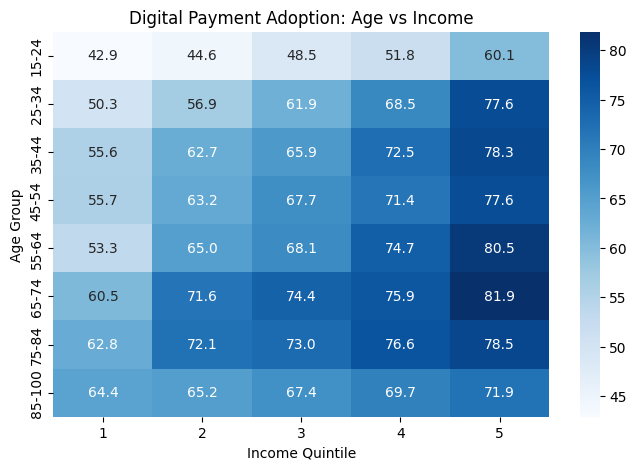

In [19]:
# Heatmap for Age Group vs Income Level
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_age_income, cmap="Blues", annot=True, fmt=".1f")
plt.xlabel("Income Quintile")
plt.ylabel("Age Group")
plt.title("Digital Payment Adoption: Age vs Income")
plt.show()

In [20]:
# Age Group vs Education Level
pivot_age_education = pd.pivot_table(
    country_databank, values='anydigpayment', index='age_group', columns='educ', aggfunc='mean'
) * 100
pivot_age_education

<ipython-input-20-a6fa744d8f99>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_age_education = pd.pivot_table(


educ,1,2,3
age_group,,,
15-24,27.783888,55.335725,81.126645
25-34,32.201141,68.376382,88.107798
35-44,35.548308,72.001278,92.261905
45-54,36.875207,74.343878,93.468599
55-64,38.604554,77.833817,93.629592
65-74,47.298787,81.512449,93.510119
75-84,48.828372,82.258065,91.931097
85-100,43.979058,80.994152,88.938053


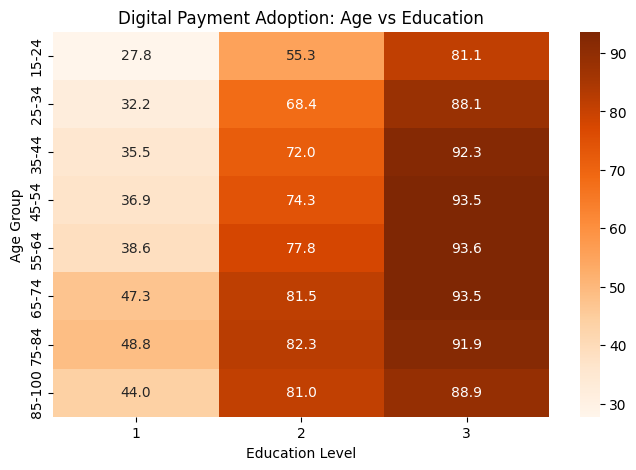

In [21]:
# Heatmap for Age Group vs Education Level
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_age_education, cmap="Oranges", annot=True, fmt=".1f")
plt.xlabel("Education Level")
plt.ylabel("Age Group")
plt.title("Digital Payment Adoption: Age vs Education")
plt.show()

In [22]:
# Gender vs Income Level
pivot_gender_income = pd.pivot_table(
    country_databank, values='anydigpayment', index='female', columns='inc_q', aggfunc='mean'
) * 100
pivot_gender_income

inc_q,1,2,3,4,5
female,,,,,
0,56.290841,63.491763,67.573752,71.545492,79.007056
1,49.265412,56.263674,59.720298,65.185598,70.896391


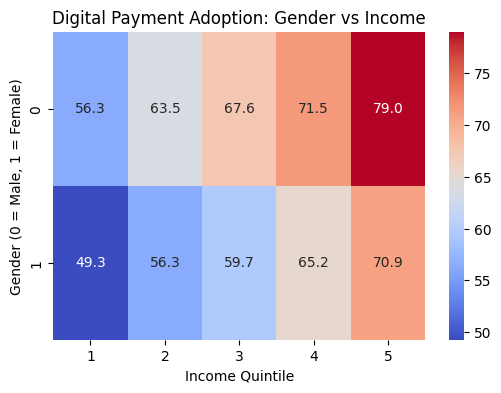

In [23]:
# Heatmap for Gender vs Income Level
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_gender_income, cmap="coolwarm", annot=True, fmt=".1f")
plt.xlabel("Income Quintile")
plt.ylabel("Gender (0 = Male, 1 = Female)")
plt.title("Digital Payment Adoption: Gender vs Income")
plt.show()

In [24]:
# Region vs Education Level
pivot_region_education = pd.pivot_table(
    country_databank, values='anydigpayment', index='regionwb', columns='educ', aggfunc='mean'
) * 100
pivot_region_education

educ,1,2,3
regionwb,,,
East Asia & Pacific (excluding high income),42.240251,70.778217,94.050104
Europe & Central Asia (excluding high income),39.021852,63.326672,85.603743
High income,81.510710,95.021262,97.899606
Latin America & Caribbean (excluding high income),29.835082,54.172784,80.916844
Middle East & North Africa (excluding high income),24.144368,33.000400,61.352391
South Asia,22.467726,46.847636,65.434381
Sub-Saharan Africa (excluding high income),30.848203,62.617357,87.951807


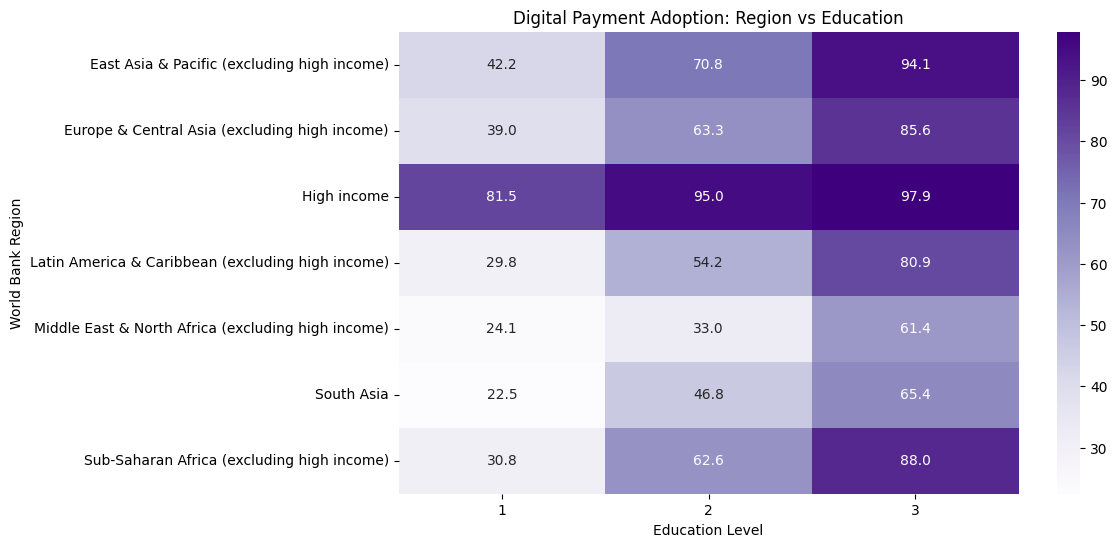

In [25]:
# Heatmap for Region vs Education Level
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_region_education, cmap="Purples", annot=True, fmt=".1f")
plt.xlabel("Education Level")
plt.ylabel("World Bank Region")
plt.title("Digital Payment Adoption: Region vs Education")
plt.xticks(rotation=0)
plt.show()

In [27]:
# Region vs Age Group
pivot_region_age = pd.pivot_table(
    country_databank, values='anydigpayment', index='regionwb', columns='age_group', aggfunc='mean'
) * 100
pivot_region_age

<ipython-input-27-f89f14e1f463>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_region_age = pd.pivot_table(


age_group,15-24,25-34,35-44,45-54,55-64,65-74,75-84,85-100
regionwb,,,,,,,,
East Asia & Pacific (excluding high income),62.995427,75.952312,72.361111,64.049811,54.610564,50.000000,42.592593,40.000000
Europe & Central Asia (excluding high income),58.731372,72.061555,72.301691,67.842122,63.309353,61.960784,48.265896,42.608696
High income,88.485360,95.492383,96.532923,96.704225,95.968810,95.188387,92.032869,88.869565
Latin America & Caribbean (excluding high income),48.930401,57.827815,56.338481,51.480730,46.322379,44.057725,41.962422,32.989691
Middle East & North Africa (excluding high income),22.484417,33.079558,39.924847,40.080972,45.859873,48.060345,48.837209,40.000000
South Asia,30.888781,37.648174,38.644689,35.525192,33.888048,43.416370,54.838710,35.714286
Sub-Saharan Africa (excluding high income),42.442124,56.649296,53.264813,48.746446,48.672566,41.419142,39.153439,29.464286


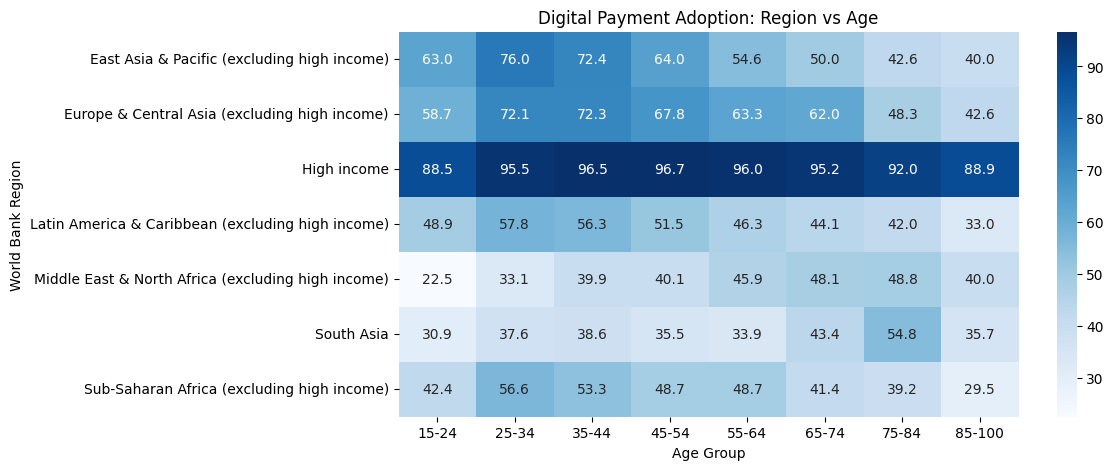

In [28]:
# Heatmap for Region vs Age Group
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_region_age, cmap="Blues", annot=True, fmt=".1f")
plt.xlabel("Age Group")
plt.ylabel("World Bank Region")
plt.title("Digital Payment Adoption: Region vs Age")
plt.xticks(rotation=0)
plt.show()

In [29]:
# Education Level vs Gender
pivot_education_gender = pd.pivot_table(
    country_databank, values='anydigpayment', index='educ', columns='female', aggfunc='mean'
) * 100

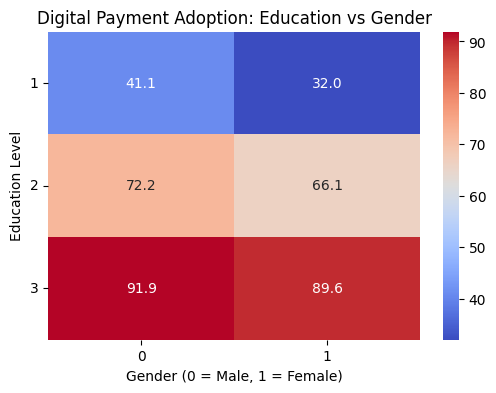

In [30]:
# Heatmap for Education Level vs Gender
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_education_gender, cmap="coolwarm", annot=True, fmt=".1f")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.ylabel("Education Level")
plt.title("Digital Payment Adoption: Education vs Gender")
plt.yticks(rotation=0)
plt.show()

## Correlation Matrix


Correlation Matrix:
                 anydigpayment       age    female     inc_q      educ  \
anydigpayment        1.000000  0.138829 -0.090633  0.164324  0.408152   
age                  0.138829  1.000000  0.009290  0.007493  0.019483   
female              -0.090633  0.009290  1.000000 -0.086016 -0.064476   
inc_q                0.164324  0.007493 -0.086016  1.000000  0.246963   
educ                 0.408152  0.019483 -0.064476  0.246963  1.000000   
internetaccess       0.379475 -0.044834 -0.073527  0.156261  0.426294   
mobileowner          0.312743  0.011669 -0.084177  0.112858  0.282583   

                internetaccess  mobileowner  
anydigpayment         0.379475     0.312743  
age                  -0.044834     0.011669  
female               -0.073527    -0.084177  
inc_q                 0.156261     0.112858  
educ                  0.426294     0.282583  
internetaccess        1.000000     0.423505  
mobileowner           0.423505     1.000000  


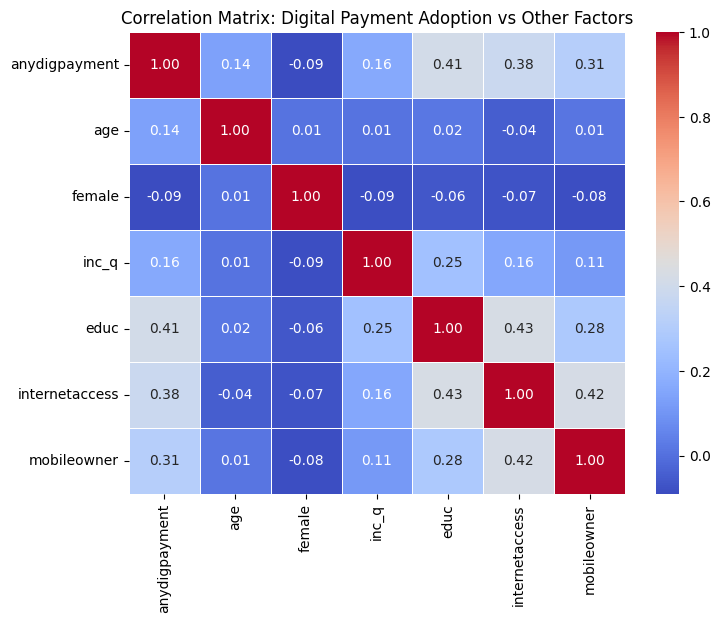

In [31]:
correlation_columns = ['anydigpayment', 'age', 'female', 'inc_q', 'educ', 'internetaccess', 'mobileowner']

correlation_matrix = country_databank[correlation_columns].corr()

print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Digital Payment Adoption vs Other Factors")
plt.show()

## Predictive Modelling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



Logistic Regression Accuracy: 0.7584

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.54      0.61     10010
           1       0.78      0.87      0.82     18617

    accuracy                           0.76     28627
   macro avg       0.74      0.71      0.72     28627
weighted avg       0.75      0.76      0.75     28627



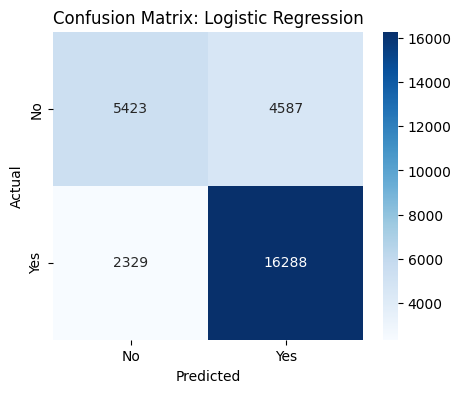


Decision Tree Accuracy: 0.7599

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64     10010
           1       0.80      0.83      0.82     18617

    accuracy                           0.76     28627
   macro avg       0.74      0.73      0.73     28627
weighted avg       0.76      0.76      0.76     28627



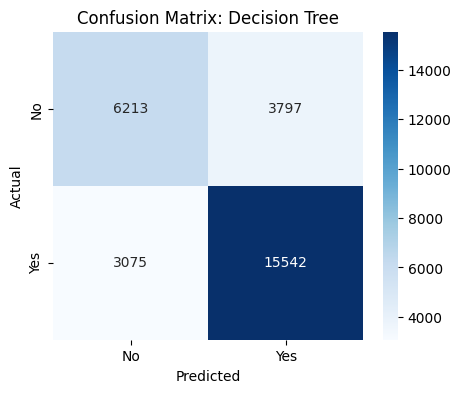


Random Forest Accuracy: 0.7548

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.57      0.62     10010
           1       0.79      0.85      0.82     18617

    accuracy                           0.75     28627
   macro avg       0.73      0.71      0.72     28627
weighted avg       0.75      0.75      0.75     28627



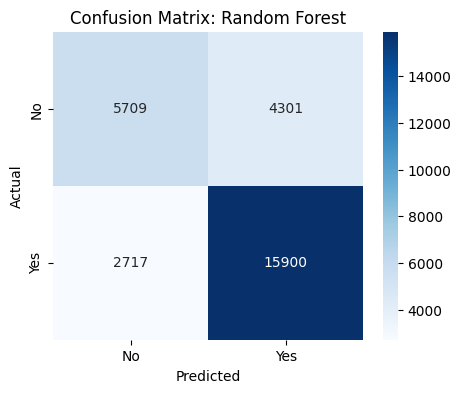

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:48:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.7628

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.64     10010
           1       0.80      0.86      0.82     18617

    accuracy                           0.76     28627
   macro avg       0.74      0.72      0.73     28627
weighted avg       0.76      0.76      0.76     28627



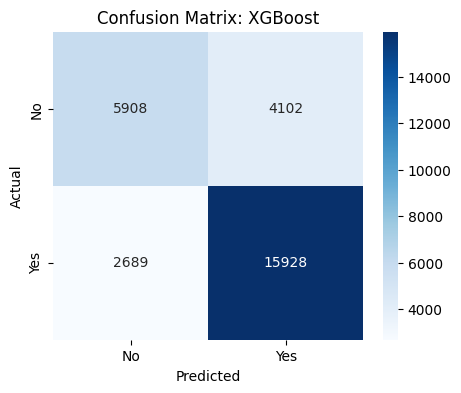

In [33]:
features = ['age', 'female', 'inc_q', 'educ', 'internetaccess', 'mobileowner']
target = 'anydigpayment'

country_databank = country_databank.dropna(subset=features + [target])

X = country_databank[features]
y = country_databank[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


# Model 1: Logistic Regression
log_model = LogisticRegression()
train_evaluate_model(log_model, "Logistic Regression")

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
train_evaluate_model(dt_model, "Decision Tree")

# Model 3: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf_model, "Random Forest")

# Model 4: XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
train_evaluate_model(xgb_model, "XGBoost")